In [51]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import random
import matplotlib.colors as colors
import json

from scipy.stats import iqr

In [73]:
percentages = [0.2, 0.5, 0.8]

R2 = json.load(open('../experiments/R2_'+str(1.7)+'.txt'))
R2_sq = [json.load(open('../experiments/R2_squared_'+str(p)+'.txt')) for p in percentages]
R2_lung = [json.load(open('../experiments/R2_lung_'+str(p)+'.txt')) for p in percentages]
R2_kill = [json.load(open('../experiments/R2_squared_k0.8_'+str(p)+'.txt')) for p in percentages]

In [74]:
def zoom_r2(R2):
    baseline = np.array(R2['mean_over_cells'])
    
    for alg in R2:
        R2[alg] = 1 - (1 - np.array(R2[alg]))/(1 - baseline)
        
    return R2

def boxplot(dict1, delete = False, zoom = False):
    if delete:
        dict1 = dict1.copy()
        del dict1['cf_drugs']
        del dict1['np_drugs']
        del dict1['mean_over_drugs']
        
    if zoom:
        dict1 = dict1.copy()
        dict1 = zoom_r2(dict1)
    
    labels, data = dict1.keys(), dict1.values()

    bp = plt.boxplot(data)
    
    m = []
    s = []
    for l in labels:
        m.append(np.median(dict1[l]))
        s.append(iqr(dict1[l]))
    
    for i, line in enumerate(bp['medians']):
        x, y = line.get_xydata()[0]
        text = '{:.2f}'.format(m[i])
        #plt.annotate(text, xy=(x, y+s[i]))
        plt.annotate(text, xy=(x, 0.8))
    
    plt.xticks(range(1, len(labels) + 1), labels, rotation=90)
    plt.ylim(0,1)
    plt.ylabel('R2')
    plt.show()

In [178]:
def box_plots(data = 'squared', plots = 3, delete = False, zoom = False, annotate = True, show_title = True):
    
    #if plots == 3: percentages = [0.2, 0.5, 0.8]
    if plots == 3: percentages = [0.1, 0.2, 0.5]
    elif plots == 2: percentages = [0.1, 0.2]
    else: percentages = [0.1, 0.2, 0.5, 0.8, 0.9]
    
    fig, axs = plt.subplots(1, plots, sharey=True, figsize=(15, 5))
    fig.supylabel('R2', fontsize = 20)
    
    plt.tight_layout()
    
    
    dicts = [json.load(open('../experiments/R2_'+data+'_'+str(p)+'.txt')) for p in percentages]
    
    try:
        experiments = str(len(dicts[0]['mean_over_cells']))
    except:
        experiments = '?'
    title = ''
    if zoom: title += 'zoomed '
    title += 'R2 values for '+experiments+' experiments in '+data+' data'
    if show_title: fig.suptitle(title, fontsize = 20)
    
    
    for i, d in enumerate(dicts):    
        if delete:
            d = d.copy()
            
            
            d['mean-over-contexts'] = d.pop('mean_over_cells')
            d['mean-over-actions'] = d.pop('mean_over_drugs')
            d['FE'] = d.pop('fixed_effect')
            #d['Doubly Robust NN'] = d.pop('doubly_robust_nn_0.25')
            d['CF-contexts'] = d.pop('cf_cells')
            d['CF-actions'] = d.pop('cf_drugs')
            d['CF10-contexts'] = d.pop('np_cells')
            del d['CF10-contexts']
            d['CF10-actions'] = d.pop('np_drugs')
            del d['CF10-actions']
            d['CF-FE-contexts'] = d.pop('cf_fe_cells')
            del d['CF-FE-contexts']
            d['CF-FE-actions'] = d.pop('cf_fe_drugs')
            del d['CF-FE-actions']
            d['SI-actions'] = d.pop('squared_si_drugs')
            del d['SI-actions']
            d['NNM'] = d.pop('nnm')
            d['NNM-FE'] = d.pop('nnm_fe')
            d['SI'] = d.pop('squared_si_cells')
            d['SI-meancontexs'] = d.pop('squared_csi_cells')
            del d['SI-meancontexs']
            d['SI-meanactions'] =d.pop('squared_csi_drugs')
            del d['SI-meanactions']
            d['SI-FE'] = d.pop('SI-FE')
            d['kernel-SI'] = d.pop('squared_kernel_si_cells')
            d['kernel-SI-actions'] = d.pop('squared_kernel_si_drugs')
            del d['kernel-SI-actions']
            
            """
            
            del d['np_cells']
            del d['np_drugs']
            #del d['mean_over_drugs']
            del d['cf_fe_cells']
            del d['cf_fe_drugs']
            d['SI'] = d.pop('squared_si_cells')
            #d['centered_SI_cells'] = d.pop('squared_csi_cells')
            #d['centered_SI_drugs'] = d.pop('squared_csi_drugs')
            del d['centered_SI_cells']
            del d['centered_SI_drugs']
            d['centered_SI_drugs'] = d.pop('squared_csi_drugs')
            
            d['kernel_SI'] = d.pop('squared_kernel_si_cells')
            del d['squared_si_drugs']
            del d['squared_kernel_si_drugs']
            """
            

        if zoom:
            d = d.copy()
            d = zoom_r2(d)

        labels, data = d.keys(), d.values()

        bp = axs[i].boxplot(data)
        
        if annotate:
            m = []
            s = []
            for l in labels:
                m.append(np.median(d[l]))
                s.append(iqr(d[l]))

            for idx, line in enumerate(bp['medians']):
                x, y = line.get_xydata()[0]
                text = '{:.2f}'.format(m[idx])
                if text[0] != '-':text = text[1:]
                else: text = '-' + text[2:]
                #axs[i].annotate(text, xy=(x, y+s[idx]), color='green')
                axs[i].annotate(text, xy=(x, 0.85), fontsize=18)
                #axs[i].annotate(text, xy=(x, 0.8))

        axs[i].set_xticks(range(1, len(labels) + 1), labels, rotation=90, fontsize = 18)
        #axs[i].set_yticks(fontsize = 18)
        axs[i].set_ylim(0,1)
        #axs[i].set_xlabel('algorithm', fontsize = 15)
        axs[i].set_title('Missing ' + '{:.0f}'.format(100*(1 - percentages[i])**2) + '%', fontsize = 20)
        
        #plt.show()

In [111]:
import seaborn as sns
sns.set()

In [62]:
sns.reset_orig()

In [181]:
sns.set(font_scale=1.6)

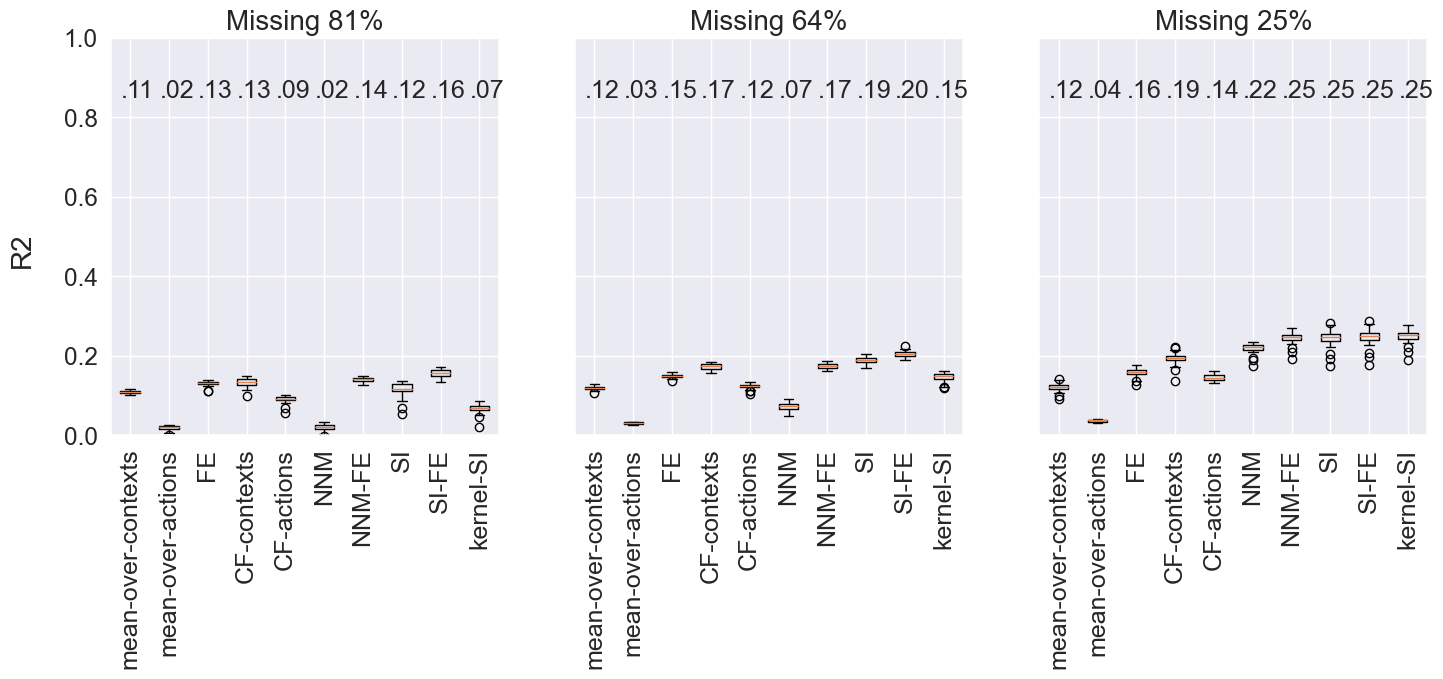

In [182]:
box_plots(data='squared_k0.8', plots = 3, zoom=False, delete = True, show_title = False)

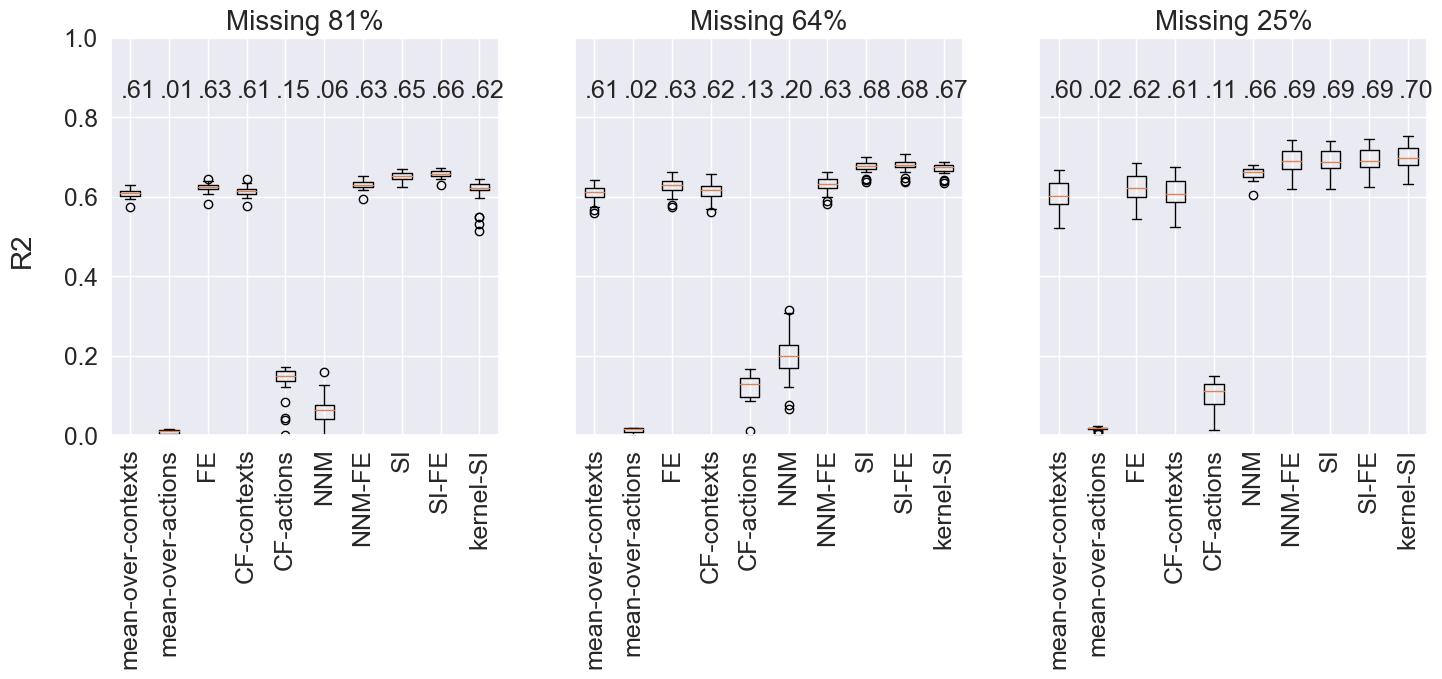

In [183]:
box_plots(data='squared', plots = 3, zoom=False, delete = True, show_title = False)

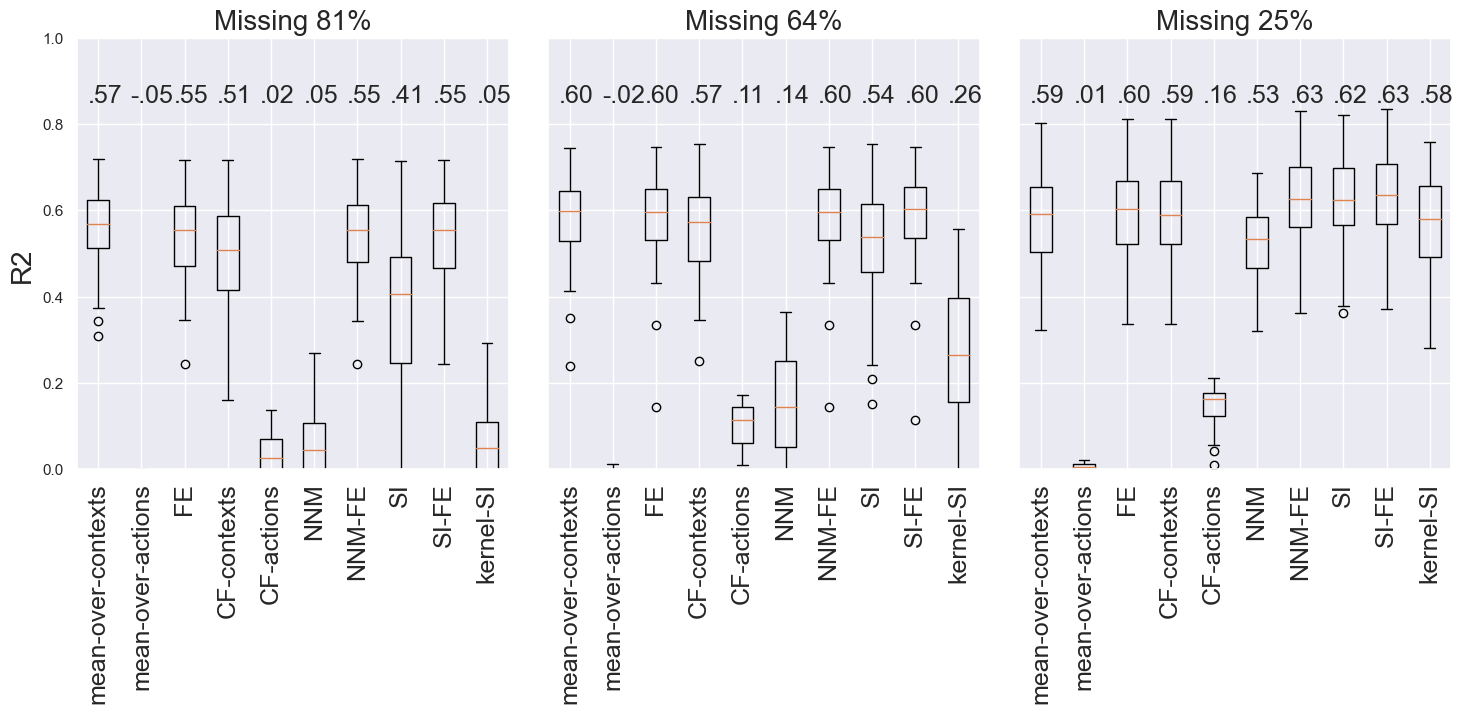

In [164]:
box_plots(data='lung', plots = 3, zoom=False, delete = True, show_title = False)

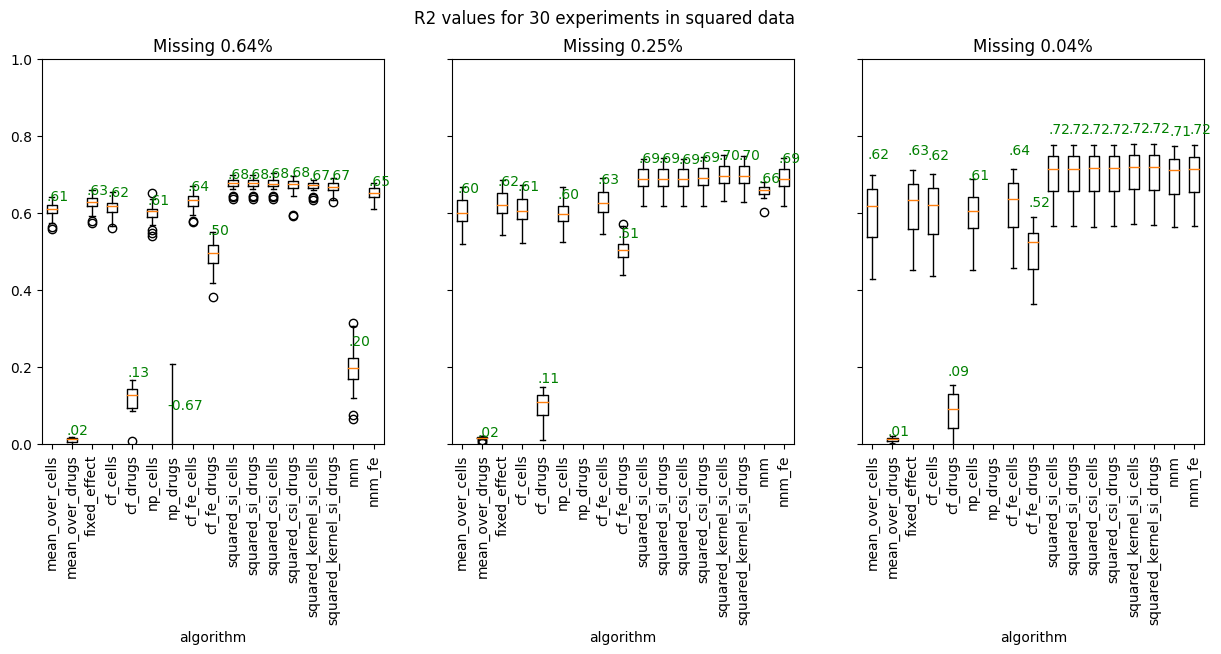

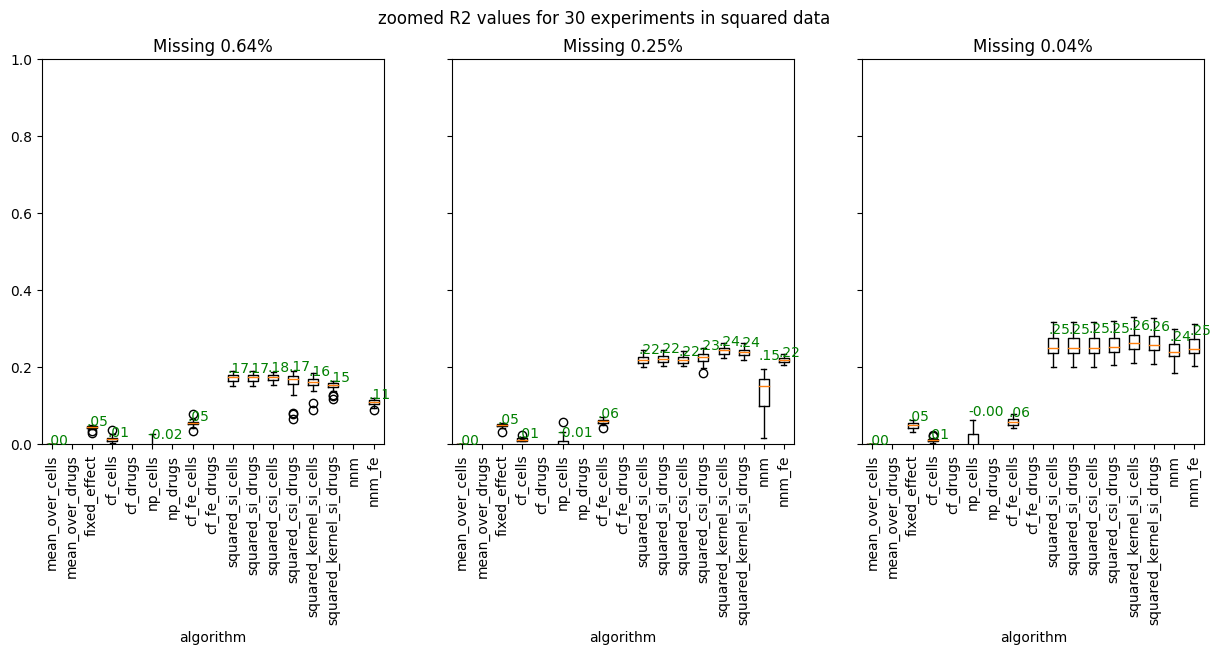

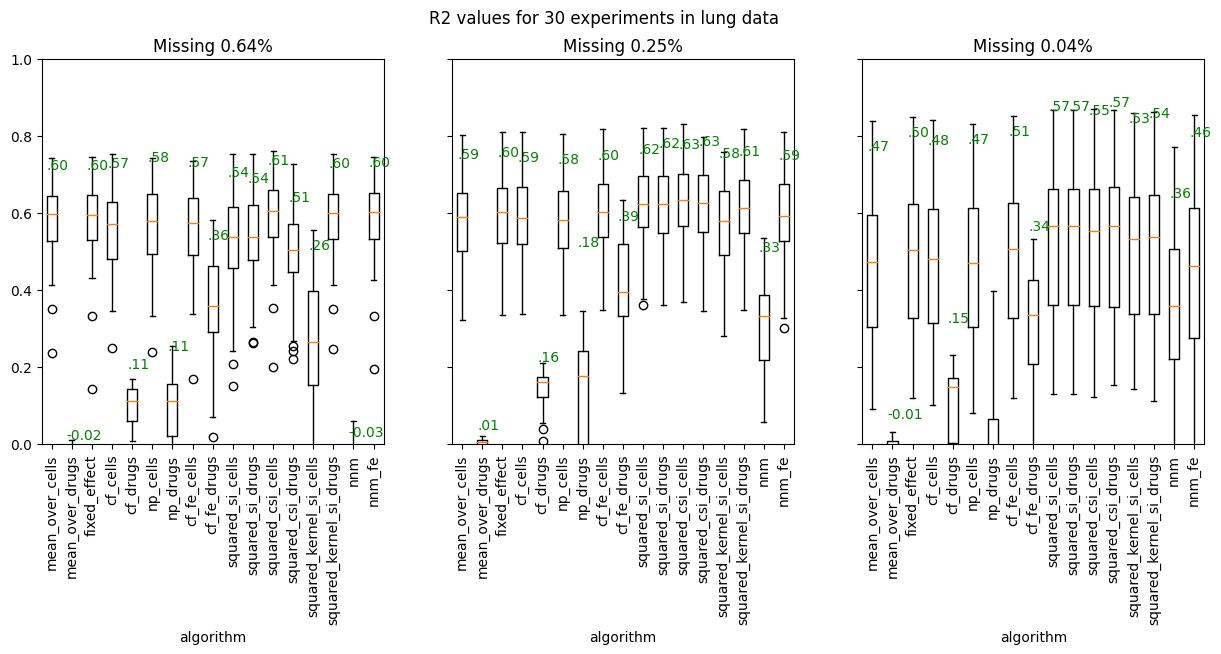

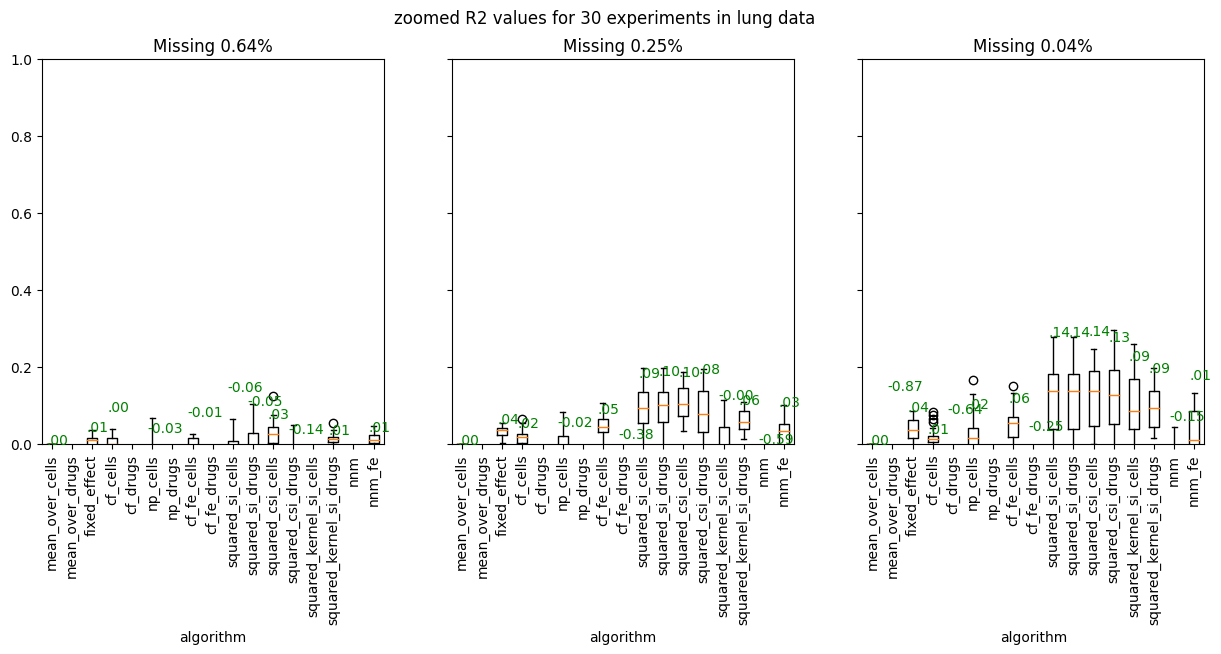

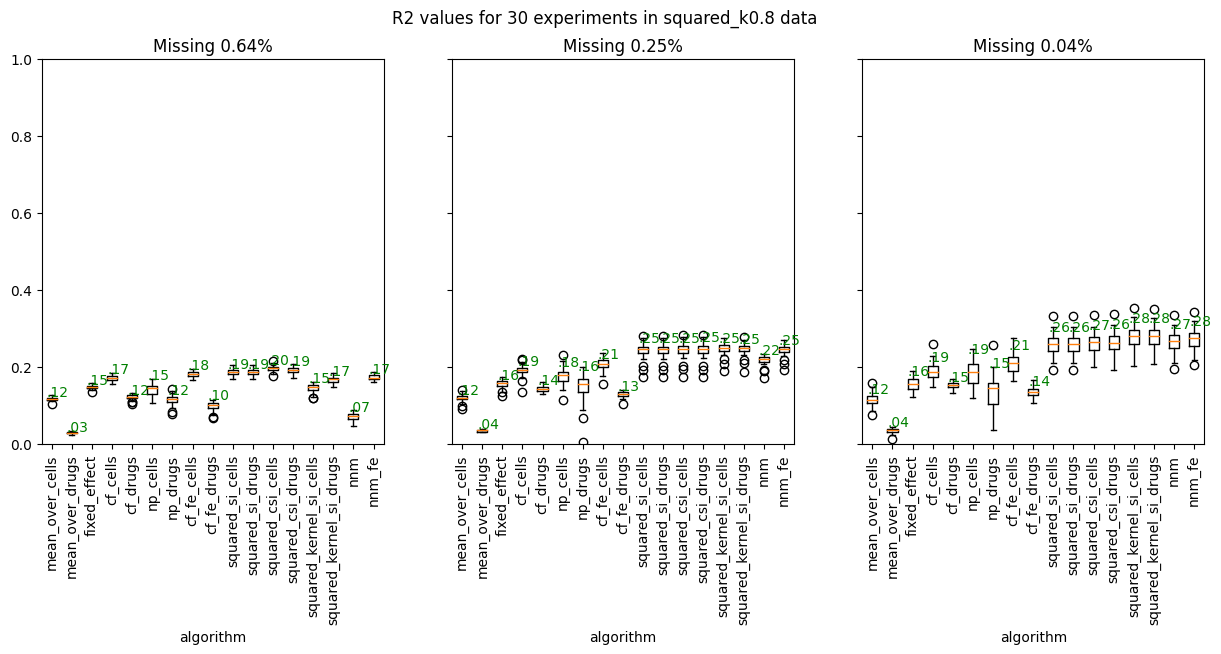

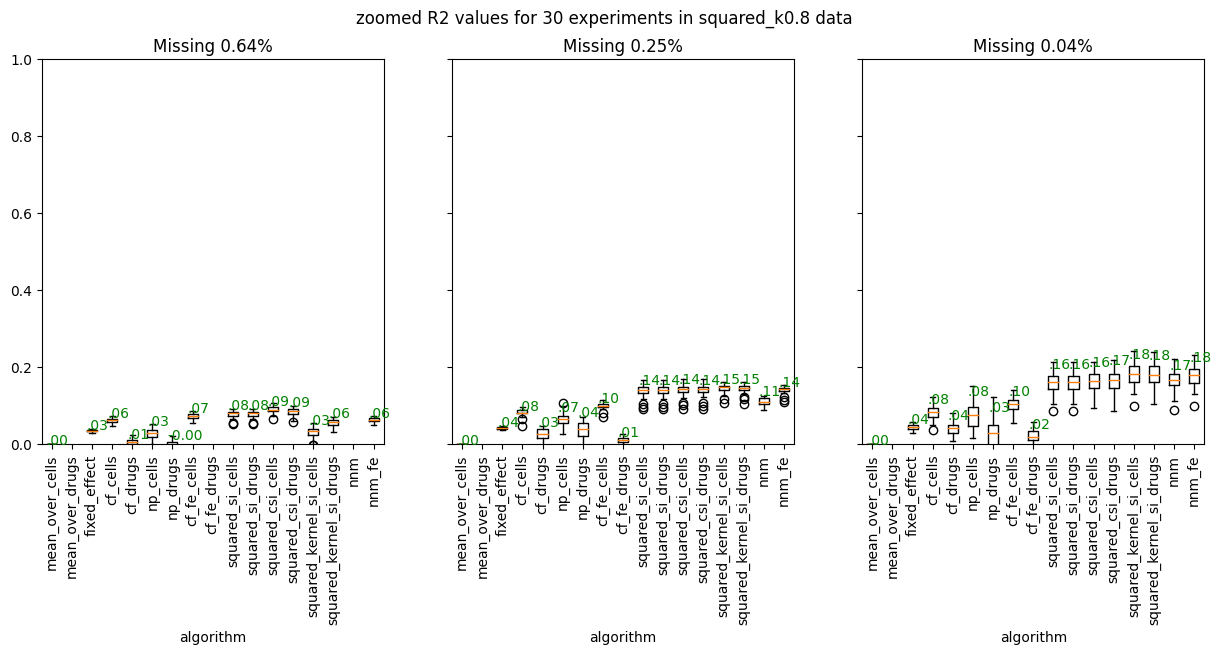

In [37]:
for data in ['squared', 'lung', 'squared_k0.8']:
    for zoom in [False, True]:
        box_plots(data=data, zoom=zoom)

### Doubly_robust_nn

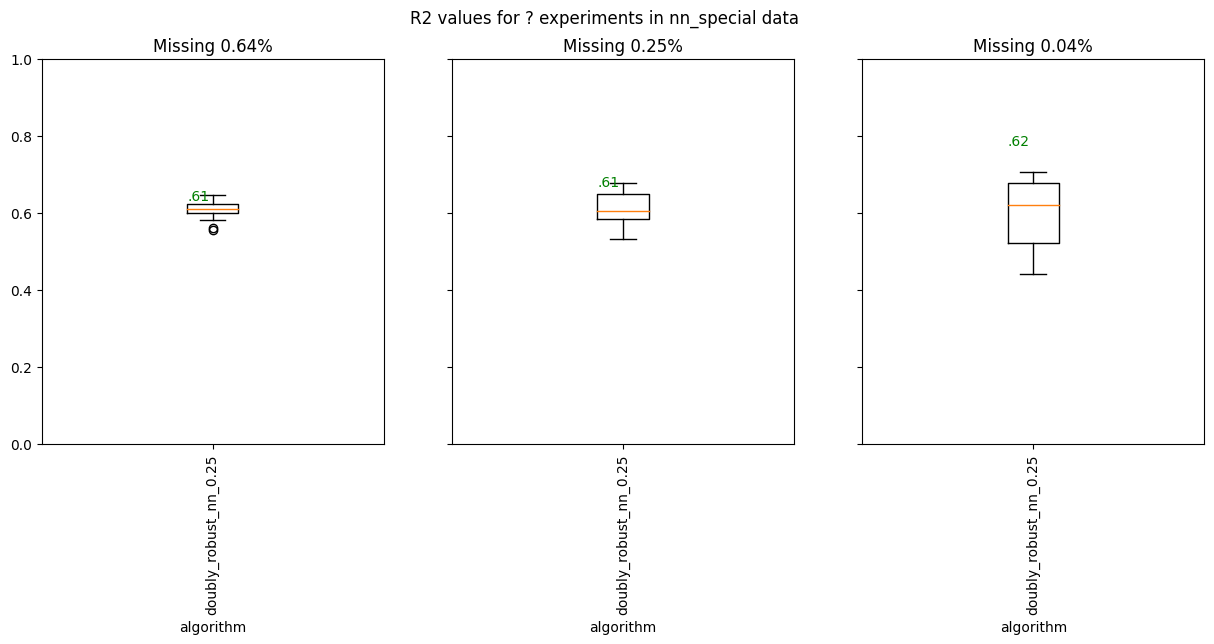

In [51]:
box_plots(data='nn_special', zoom=False)

# boxplots presentation

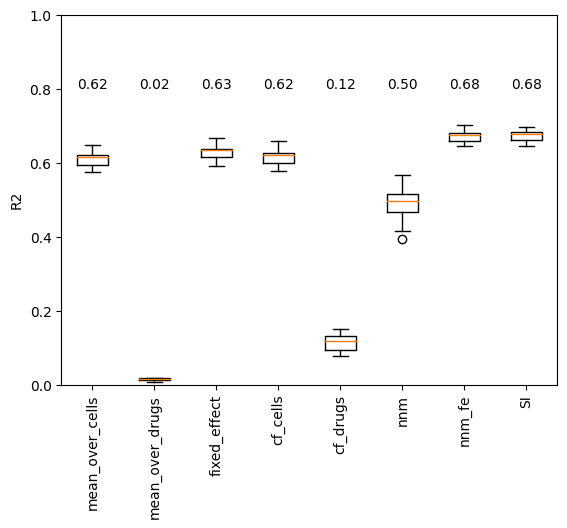

In [18]:
aux = R2.copy()
del aux['np_cells']
del aux['np_drugs']
del aux['cf_fe_drugs']
del aux['cf_fe_cells']
#aux['mean_cells'] = aux.pop('mean_over_cells')
aux['SI'] = aux.pop('si_cells')
boxplot(aux)

In [41]:
len(R2['cf_cells'])

10

In [40]:
len(R2_sq[0]['cf_cells'])

30

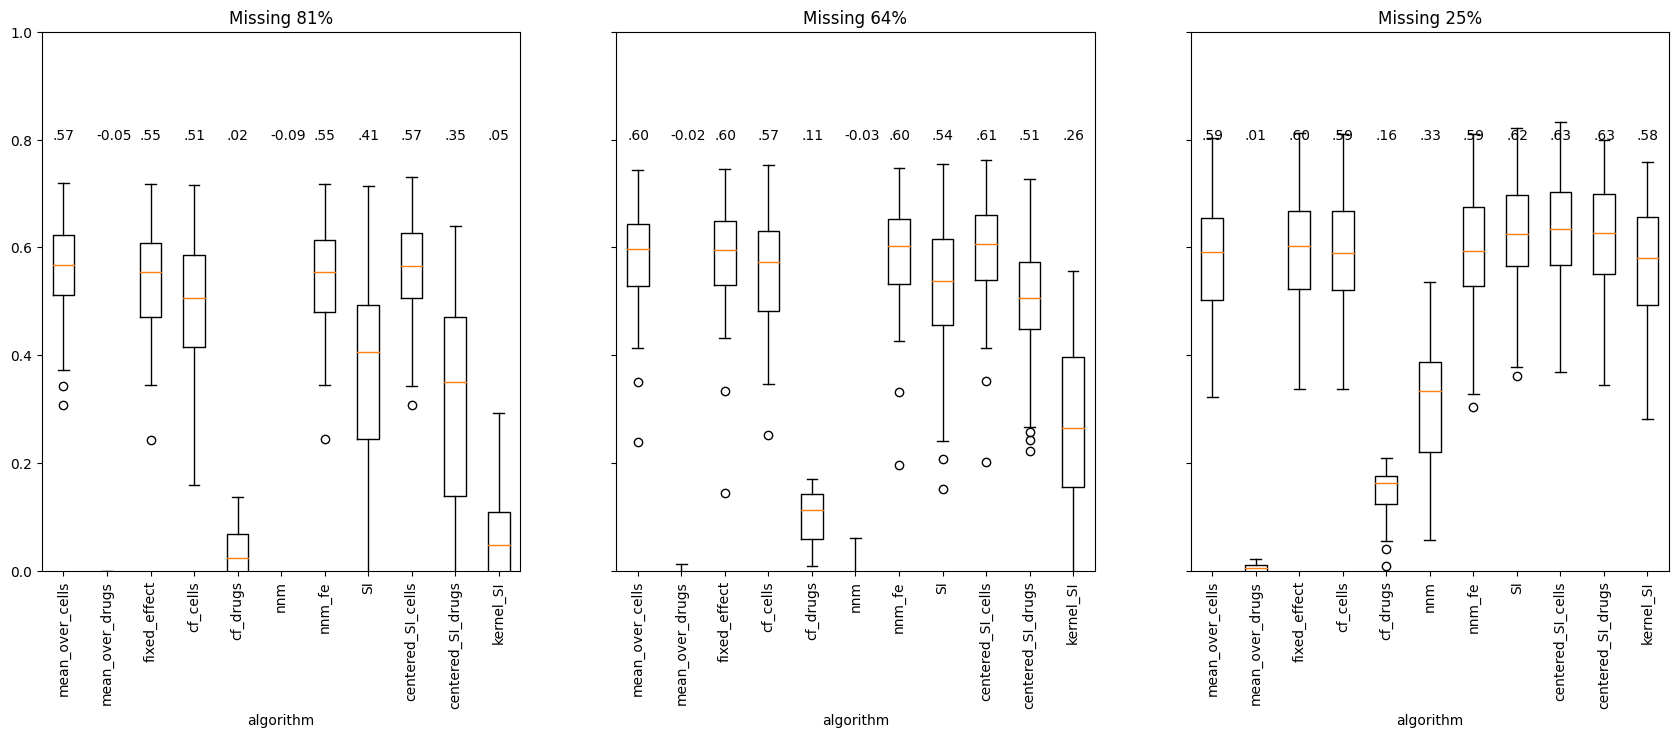

In [51]:
box_plots(data='lung', plots = 3, zoom=False, delete = True, show_title = False)

# Change NNM in boxplots

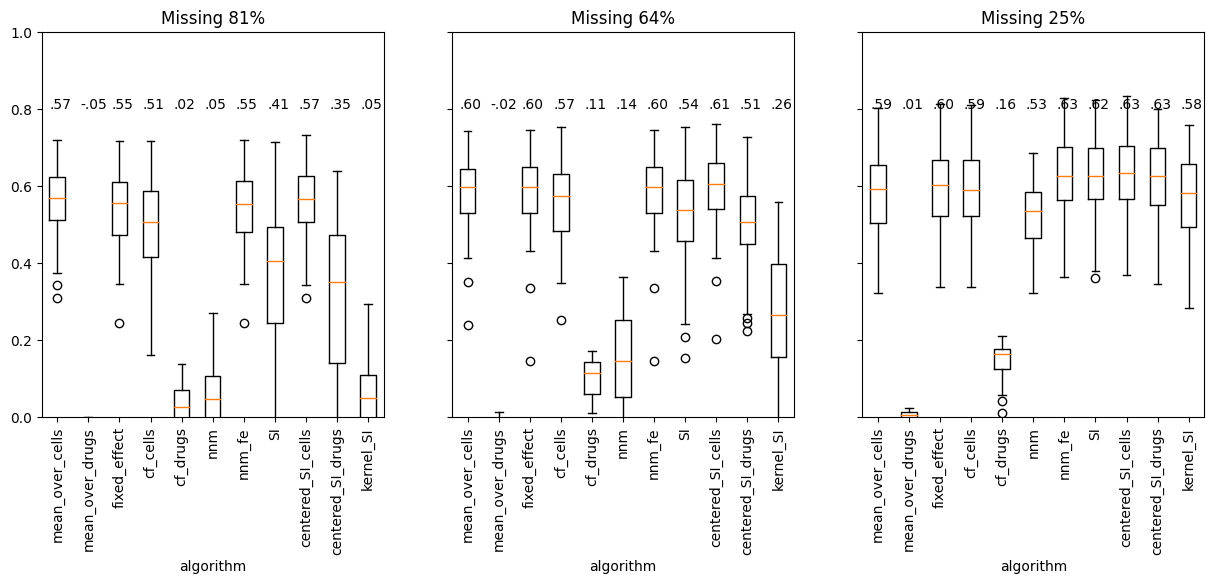

In [85]:
box_plots(data='lung', plots = 3, zoom=False, delete = True, show_title = False)

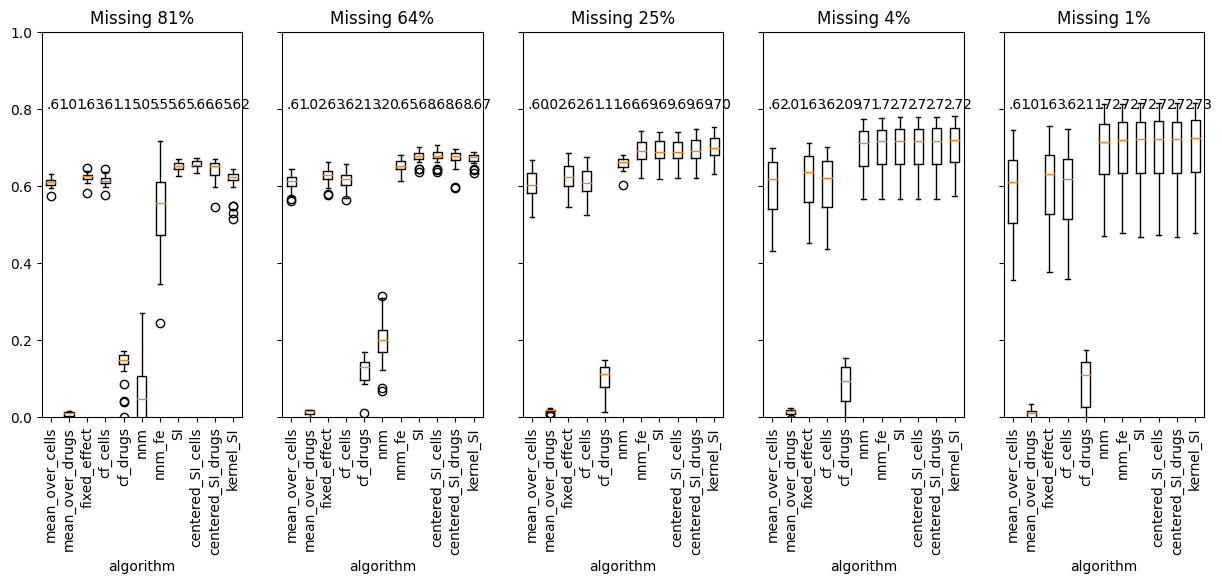

In [78]:
box_plots(data='squared', plots = 5, zoom=False, delete = True, show_title = False)

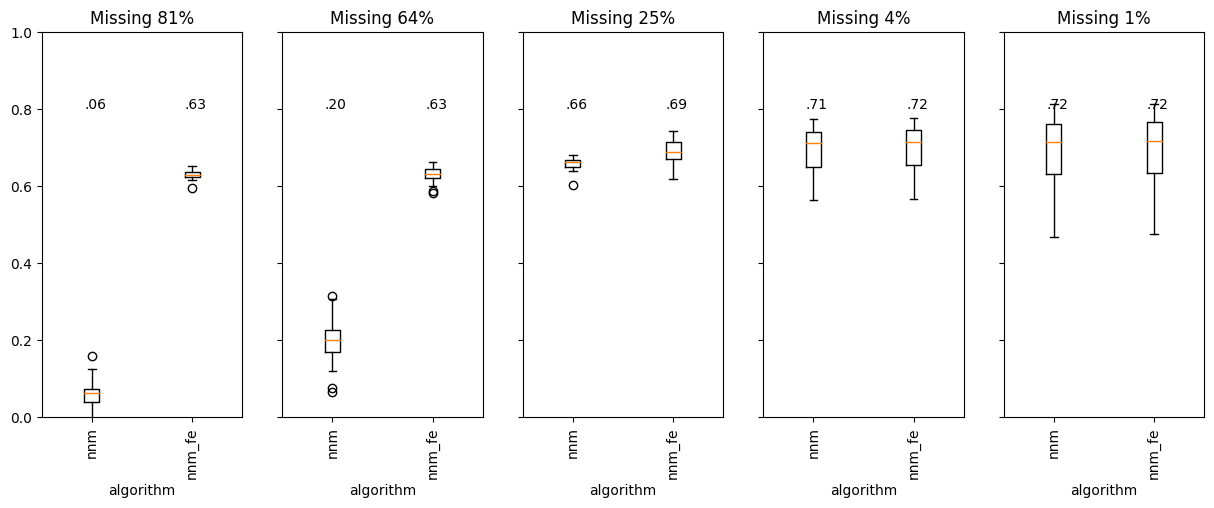

In [79]:
box_plots(data='nnm', plots = 5, zoom=False, delete = False, show_title = False)

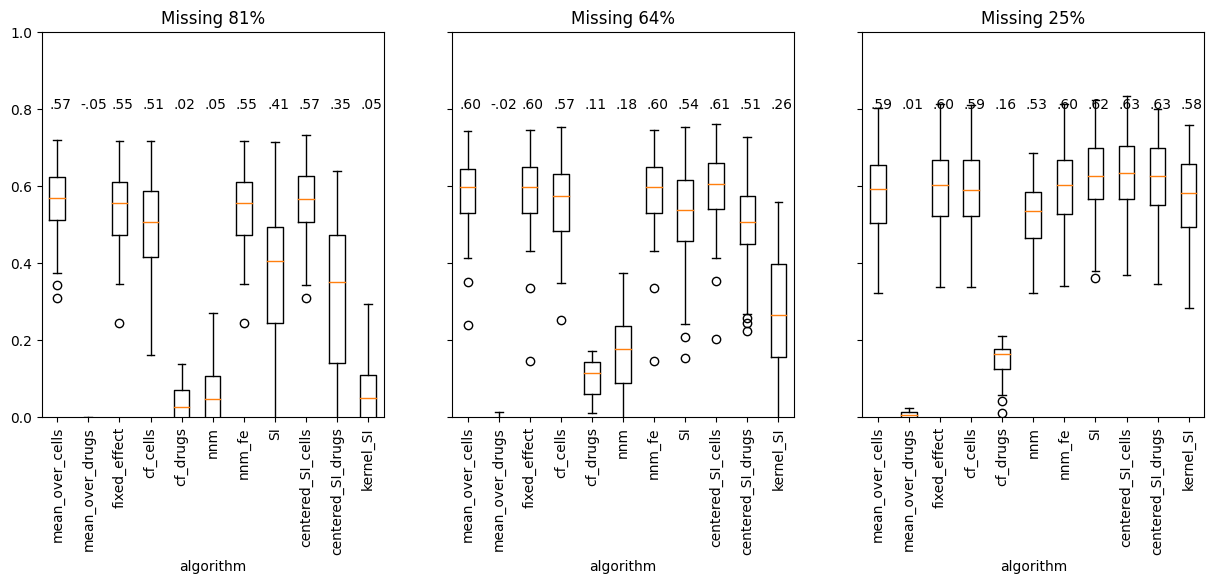

In [49]:
box_plots(data='lung', plots = 3, zoom=False, delete = True, show_title = False)

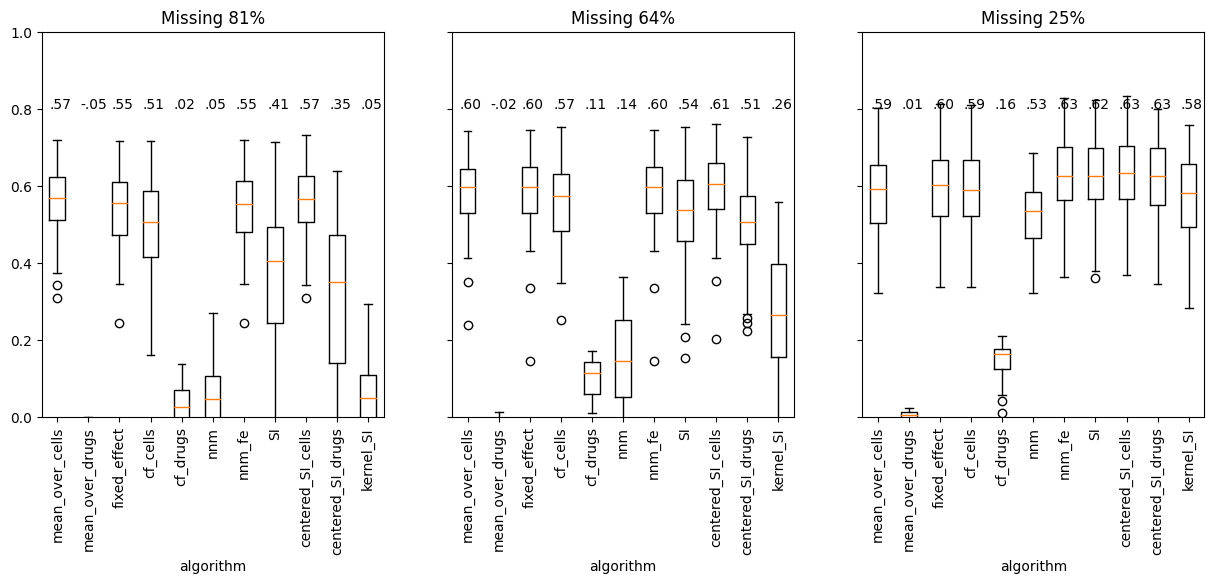

In [55]:
box_plots(data='lung', plots = 3, zoom=False, delete = True, show_title = False)

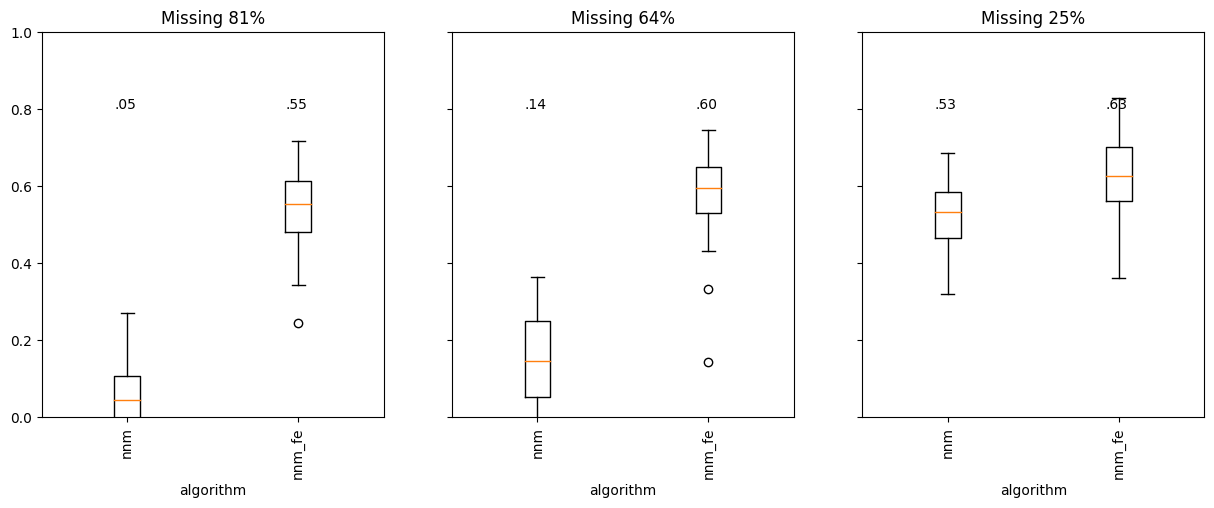

In [52]:
box_plots(data='nnm_lung', plots = 3, zoom=False, delete = False, show_title = False)

In [68]:
data = 'squared_k0.8'

for p in [0.1, 0.2, 0.5, 0.8, 0.9]:
    dic1 = json.load(open('../experiments/R2_'+data+'_'+str(p)+'.txt'))
    dic2 = json.load(open('../experiments/R2_si_fe_killer_'+str(p)+'.txt'))
    
    dic1['SI-FE'] = dic2['si_fe']
    
    json.dump(dic1, open('../experiments/R2_'+data+'_'+str(p)+'.txt', 'w'))

# SI_FE

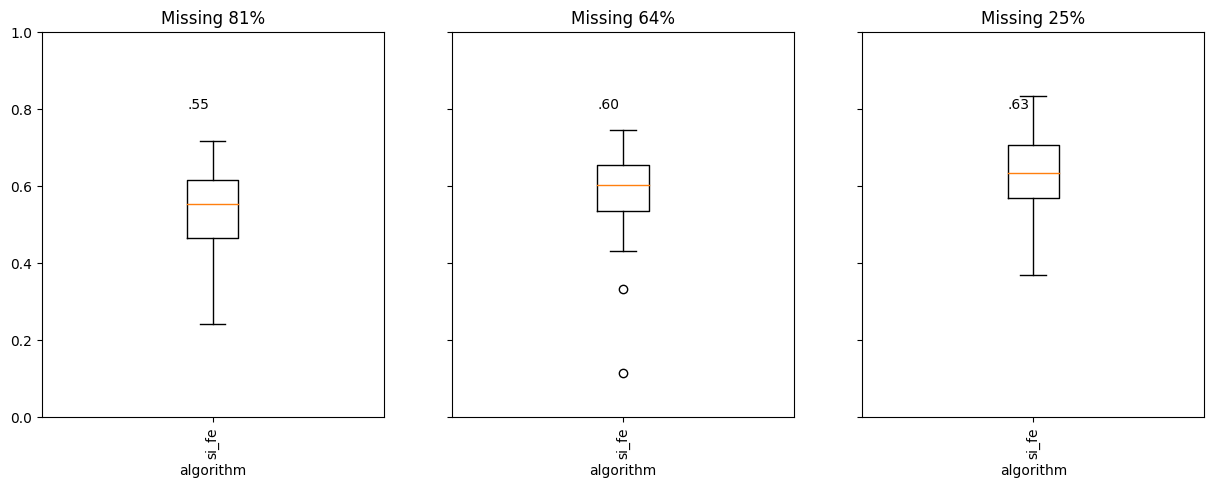

In [98]:
box_plots(data='si_fe_lung', plots = 3, zoom=False, delete = False, show_title = False)

# All algorithms

In [154]:
p = 0.2
dsq = json.load(open('../experiments/R2_squared_'+str(p)+'.txt'))
ddoubly = json.load(open('../experiments/R2_nn_special_'+str(p)+'.txt'))
dsife = json.load(open('../experiments/R2_si_fe_'+str(p)+'.txt'))

In [155]:
dsq.keys()

dict_keys(['mean_over_cells', 'mean_over_drugs', 'fixed_effect', 'cf_cells', 'cf_drugs', 'np_cells', 'np_drugs', 'cf_fe_cells', 'cf_fe_drugs', 'squared_si_cells', 'squared_si_drugs', 'squared_csi_cells', 'squared_csi_drugs', 'squared_kernel_si_cells', 'squared_kernel_si_drugs', 'nnm', 'nnm_fe', 'SI-FE'])

In [165]:
dall = dict()
dall['mean-over-contexts'] = dsq['mean_over_cells']
dall['mean-over-actions'] = dsq['mean_over_drugs']
dall['Fixed Effects'] = dsq['fixed_effect']
dall['Doubly Robust NN'] = ddoubly['doubly_robust_nn_0.25']
dall['CF-contexts'] = dsq['cf_cells']
dall['CF-actions'] = dsq['cf_drugs']
dall['CF10-contexts'] = dsq['np_cells']
dall['CF10-actions'] = dsq['np_drugs']
dall['CF-FE-contexts'] = dsq['cf_fe_cells']
dall['CF-FE-actions'] = dsq['cf_fe_drugs']
dall['SI'] = dsq['squared_si_cells']
#dall['SI-actions'] = dsq['squared_si_drugs']
dall['NNM'] = dsq['nnm']
dall['NNM-FE'] = dsq['nnm_fe']
dall['SI-mean-contexs'] = dsq['squared_csi_cells']
dall['SI-mean-actions'] =dsq['squared_csi_drugs']
dall['SI-FE'] = dsife['si_fe']
dall['kernel-SI-contexts'] = dsq['squared_kernel_si_cells']
dall['kernel-SI-actions'] = dsq['squared_kernel_si_drugs']

In [166]:
labels, data = dall.keys(), dall.values()

In [167]:
sns.reset_orig()

In [168]:
sns.set()

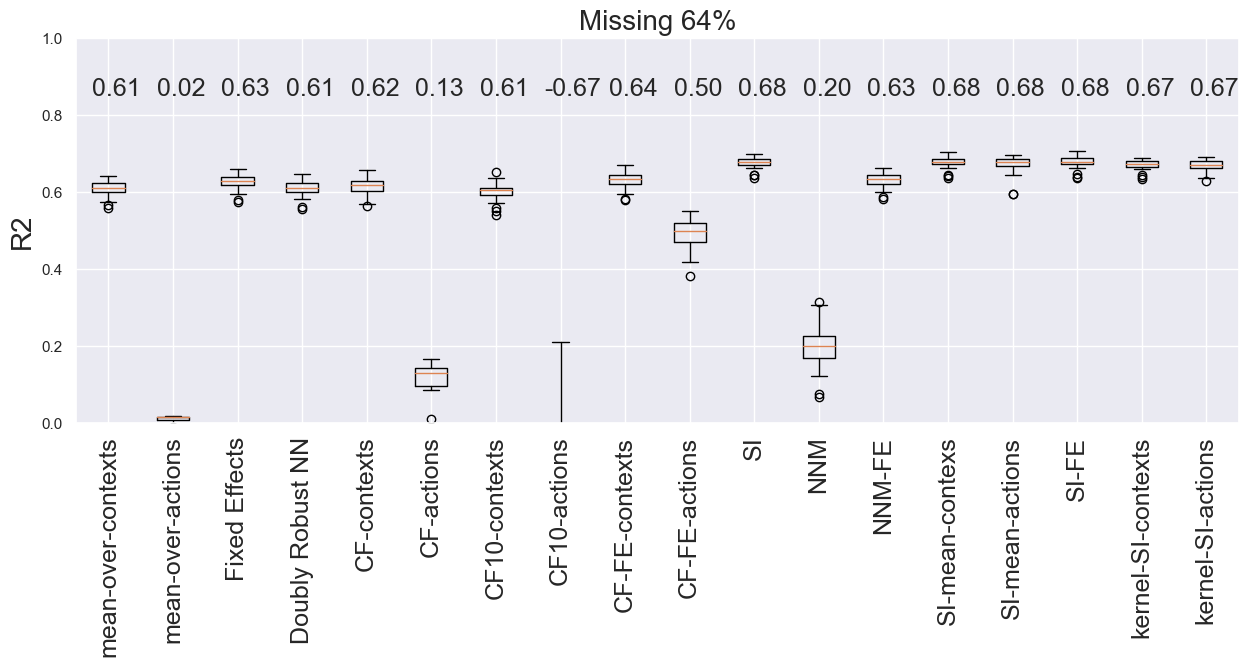

In [171]:
plt.figure(figsize=(15,5))
bp = plt.boxplot(data)
    
m = []
s = []
for l in labels:
    m.append(np.median(dall[l]))
    s.append(iqr(dall[l]))

for i, line in enumerate(bp['medians']):
    x, y = line.get_xydata()[0]
    text = '{:.2f}'.format(m[i])
    #plt.annotate(text, xy=(x, y+s[i]))
    plt.annotate(text, xy=(x, 0.85), fontsize = 18)

plt.title('Missing ' + '{:.0f}'.format(100*(1 - p)**2) + '%', fontsize = 20)    
plt.xticks(range(1, len(labels) + 1), labels, rotation=90, fontsize = 18)
plt.ylim(0,1)
plt.ylabel('R2', fontsize = 20)
plt.show()